In [88]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [89]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
data.fillna(0 , inplace=True)

In [91]:
X = data[["YearBuilt", "OverallQual", "FullBath", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GarageArea", "MoSold", "OverallCond"]].values
Y = data[["SalePrice"]].values

In [92]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape

((1168, 9), (292, 9), (1168, 1), (292, 1))

In [101]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9 , activation="sigmoid"),
    tf.keras.layers.Dense(256 , activation="relu"),
    tf.keras.layers.Dense(128 , activation="relu"),
    tf.keras.layers.Dense(32 , activation="relu"),
    tf.keras.layers.Dense(8 , activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")   # because it is a regression problem
])

In [103]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.mean_absolute_error)

In [104]:
output = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 184546.1562
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 182278.6719
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 182240.6562
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179446.1094
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 159585.7500
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111517.8359
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57438.7578
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50763.9297
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50492.3125
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49207.8672 
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53752.2734
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51312.4414
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52059.3086
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52436.8320
Epoch 15

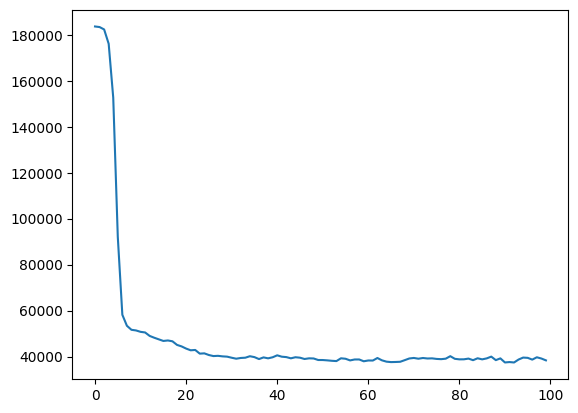

In [105]:
plt.plot(output.history["loss"])
plt.show()

In [106]:
X_valid.shape, Y_valid.shape

((292, 9), (292, 1))

In [107]:
model.evaluate(X_valid, Y_valid)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36125.0508 


33633.2578125

In [108]:
house1 = np.array([[2020, 8, 2, 1040, 800, 200, 150, 5, 6]])
model.predict(house1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[212529.86]], dtype=float32)

In [110]:
house2 = np.array([[2000, 8, 2, 800, 400, 100, 50, 4, 5]])
model.predict(house2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[140039.33]], dtype=float32)

In [100]:
model.save("/content/drive/MyDrive/my_model.h5")